In [1]:
from apts import *
import pandas as pd
%matplotlib inline  

In [2]:
import matplotlib
matplotlib.matplotlib_fname()

'/usr/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

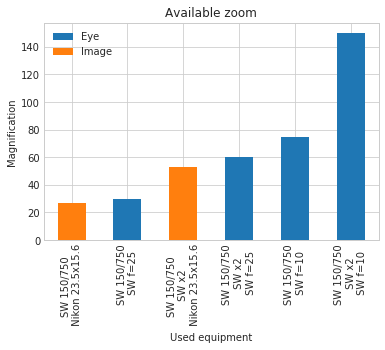

In [3]:
e = Equipment()

sky_watcher = "SW"

e.register(equipment.Camera(23.5, 15.6, 6000, 4000, "Nikon"))
e.register(equipment.Telescope(150, 750, sky_watcher, t2_output = True))
e.register(equipment.Barlow(2, sky_watcher, t2_output = True))
#e.register(equipment.Barlow(3, sky_watcher, t2_output = True))
e.register(equipment.Eyepiece(25, sky_watcher))
e.register(equipment.Eyepiece(10, sky_watcher))
#e.register(equipment.Eyepiece(6, sky_watcher))

e.plot_zoom()

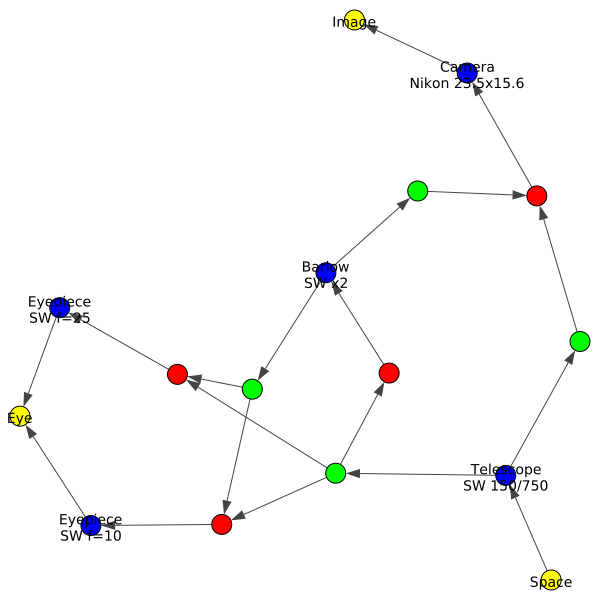

In [4]:
e.plot_connection_graph()

In [5]:
data = e.data()
data[data.useful_zoom == True].sort_values(['fov'], ascending=[0])

,label,type,zoom,useful_zoom,fov,range,brightness,elements
2,"SW 150/750, SW f=25",Eye,30.00000,True,1.733333,12.880456,51.020408,2
5,"SW 150/750, Nikon 23.5x15.6",Image,26.58956,True,1.191840,12.880456,64.947755,2
0,"SW 150/750, SW x2, SW f=25",Eye,60.00000,True,0.866667,12.880456,12.755102,3
3,"SW 150/750, SW f=10",Eye,75.00000,True,0.693333,12.880456,8.163265,2
4,"SW 150/750, SW x2, Nikon 23.5x15.6",Image,53.17912,True,0.595920,12.880456,16.236939,3
1,"SW 150/750, SW x2, SW f=10",Eye,150.00000,True,0.346667,12.880456,2.040816,3


In [6]:
observations.Conditions.MIN_TEMPERATURE = -10

place = Place(lat=50.1637973, lon=19.7855169, name="Example place")
o = Observation(place,e)

In [7]:
place.sunset_time()

datetime.datetime(2018, 3, 19, 17, 52, 15, 181942, tzinfo=tzfile('/usr/share/zoneinfo/Europe/Warsaw'))

In [8]:
place.get_weather()

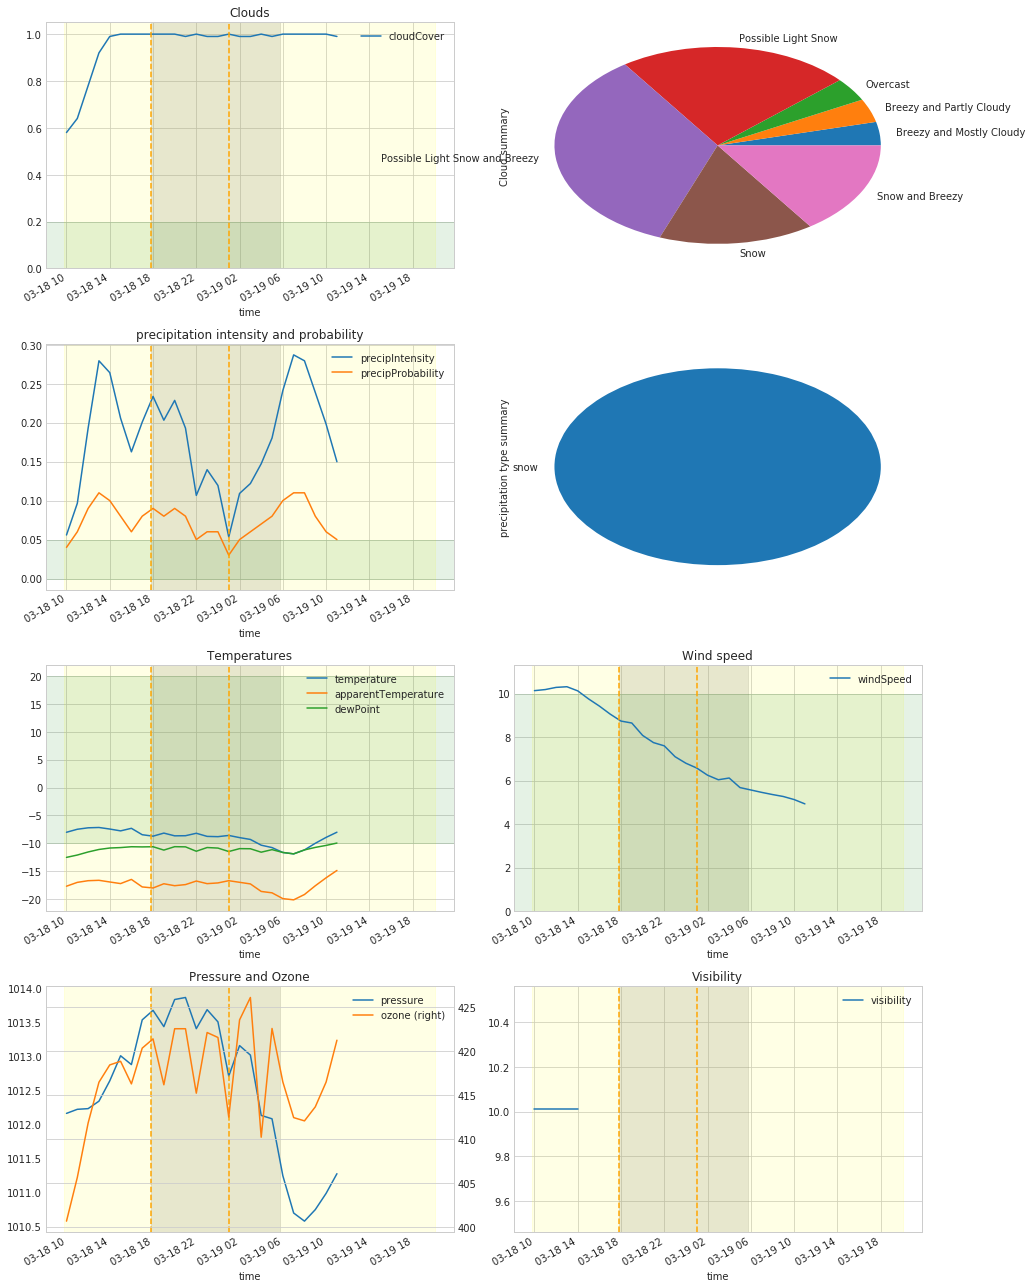

In [9]:
o.plot_weather()

In [10]:
o.weather_is_good()

False

In [11]:
o.place.moonset_time()

datetime.datetime(2018, 3, 19, 20, 4, 29, 407178, tzinfo=tzfile('/usr/share/zoneinfo/Europe/Warsaw'))

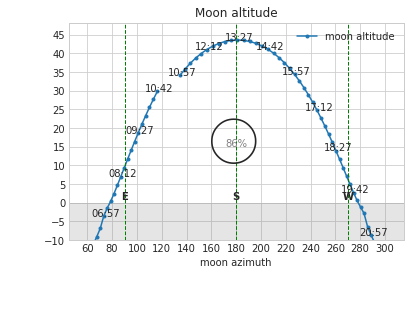

In [12]:
o.place.plot_moon_path()

In [13]:
#n = Notify('lpozarlik@gmail.com')
#n.send(o)

In [14]:
o.local_planets.objects

,Ephem,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase
0,"<Mercury ""Mercury"" at 0x7fbf8c975978>",Mercury,2018-03-18 12:49:56.013663+01:00,48.435672,0.43,0.884004,8.585414,0.832638,32.468670
1,"<Venus ""Venus"" at 0x7fbf8c975b00>",Venus,2018-03-18 12:51:00.390983+01:00,44.593332,-3.80,0.901935,4.741050,1.620578,96.029953
2,"<Mars ""Mars"" at 0x7fbf8c975c88>",Mars,2018-03-19 05:57:51.251371+01:00,16.406073,0.52,18.062918,-23.483966,1.227809,88.328110
3,"<ephem.Jupiter ""Jupiter"" at 0x7fbf8c924d20>",Jupiter,2018-03-19 03:18:30.305299+01:00,22.525073,-2.14,15.399829,-17.349351,4.782061,99.435677
4,"<ephem.Saturn ""Saturn"" at 0x7fbf8c924e90>",Saturn,2018-03-19 06:30:25.497130+01:00,17.595442,0.53,18.607251,-22.290745,10.188133,99.762039
5,"<Uranus ""Uranus"" at 0x7fbf8c975e10>",Uranus,2018-03-18 13:36:51.693338+01:00,49.669880,5.89,1.668278,9.820221,20.759928,99.985374
6,"<Neptune ""Neptune"" at 0x7fbf8c577048>",Neptune,2018-03-19 10:57:32.307081+01:00,32.917397,7.96,23.071331,-6.943293,30.907173,99.998322


In [15]:
o.get_visible_planets()

,Ephem,Name,Transit,Altitude,Magnitude,RA,Dec,Distance,Phase


In [16]:
o.get_visible_messier()

,Messier,Name,NGC,Type,Constellation,Magnitude,Distance,RA,Dec,Width,Height,Transit,Altitude
34,M35,-,NGC 2168,Open Cluster,Gemini,5.3,2800,6.148333,24.333333,28.0,28.0,2018-03-18 18:06:01.890113+01:00,64.171615
40,M41,-,NGC 2287,Open Cluster,Canis Major,4.6,2300,6.783333,-20.733333,38.0,38.0,2018-03-18 18:43:42.215196+01:00,19.122650
49,M50,-,NGC 2323,Open Cluster,Monocerus,6.3,3000,7.053333,-8.333333,16.0,16.0,2018-03-18 18:59:57.105620+01:00,31.496895
46,M47,-,NGC 2422,Open Cluster,Puppis,5.2,1600,7.610000,-14.500000,30.0,30.0,2018-03-18 19:33:13.565048+01:00,25.323876
45,M46,-,NGC 2437,Open Cluster,Puppis,6.0,5400,7.696667,-14.816667,27.0,27.0,2018-03-18 19:38:24.673897+01:00,25.005647
92,M93,-,NGC 2447,Open Cluster,Puppis,6.0,3600,7.743333,-23.866667,22.0,22.0,2018-03-18 19:41:08.510033+01:00,15.975409
47,M48,-,NGC 2548,Open Cluster,Hydra,5.5,1500,8.230000,-5.800000,54.0,54.0,2018-03-18 20:10:23.221956+01:00,34.000470
43,M44,Beehive Cluster (Praesepe),NGC 2632,Open Cluster,Cancer,3.7,577,8.668333,19.983333,95.0,95.0,2018-03-18 20:36:45.639854+01:00,59.762270
66,M67,-,NGC 2682,Open Cluster,Cancer,6.1,2700,8.840000,11.816667,30.0,30.0,2018-03-18 20:46:59.017855+01:00,51.594983
80,M81,Bode's Galaxy,NGC 3031,Spiral Galaxy,Ursa Major,6.9,12000000,9.926667,69.066667,21.0,10.0,2018-03-18 21:52:30.142519+01:00,71.187708


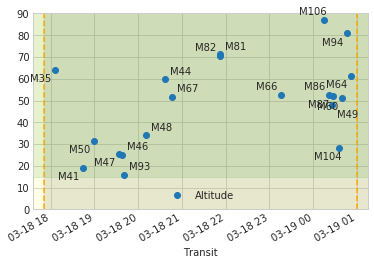

In [17]:
o.plot_messier()

In [18]:
#o.get_visible_messier().to_html('/tmp/list.html')

In [19]:
import numpy as np
import time
from datetime import datetime
import ephem
# Always get the latest ISS TLE data from:
# http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
iss = ephem.readtle('ISS',
    '1 25544U 98067A   17289.56535255  .00016717  00000-0  10270-3 0  9000',
    '2 25544  51.6389 153.2478 0004983  22.1446 337.9921 15.54200052   623'
)
#while True:
#    o.place.date = datetime.utcnow()
#    iss.compute(o.place)
#    print('iss: altitude %4.1f deg, azimuth %5.1f deg' % (np.degrees(iss.alt), np.degrees(iss.az)))
#    time.sleep(1.0)